In [36]:
# Import required libraries
from sqlalchemy import create_engine
import pandas as pd
import configparser
from urllib.parse import quote_plus 
import matplotlib.pyplot as plt

In [37]:
# Define configuration reader - create a definition for read the config.ini file and look for 'postgresql' section in file
def get_db_config():
    config = configparser.ConfigParser()
    config.read('config.ini')
    return config['postgresql-sqlda2']

db_config = get_db_config()

In [43]:
# Set up database connection
cnxn_string = ( 
    "postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}" 
)
engine = create_engine( 
    cnxn_string.format( 
        username=db_config['user'], 
        pswd=quote_plus(db_config['password']), #use quote_plus for complex passwords
        host=db_config['host'], 
        port=db_config['port'], 
        database=db_config['database'] 
    ) 
)

In [44]:
# Define SQL query
query = """
    SELECT 
        city, 
        COUNT(1) AS number_of_customers, 
        COUNT(NULLIF(gender, 'M')) AS female, 
        COUNT(NULLIF(gender, 'F')) AS male 
    FROM customers 
    WHERE city IS NOT NULL 
    GROUP BY 1 
    ORDER BY 2 DESC 
    LIMIT 10
"""

In [45]:
# Cell 5: Execute query and store results
top_cities_data = pd.read_sql_query(query, engine)

In [46]:
# Display the results
top_cities_data

,city,number_of_customers,female,male
0,Washington,1447,734,713
1,Houston,904,446,458
2,New York City,731,369,362
3,El Paso,713,369,344
4,Dallas,607,309,298
5,Atlanta,571,292,279
6,Sacramento,506,244,262
7,Los Angeles,466,241,225
8,San Antonio,426,207,219
9,Miami,426,195,231


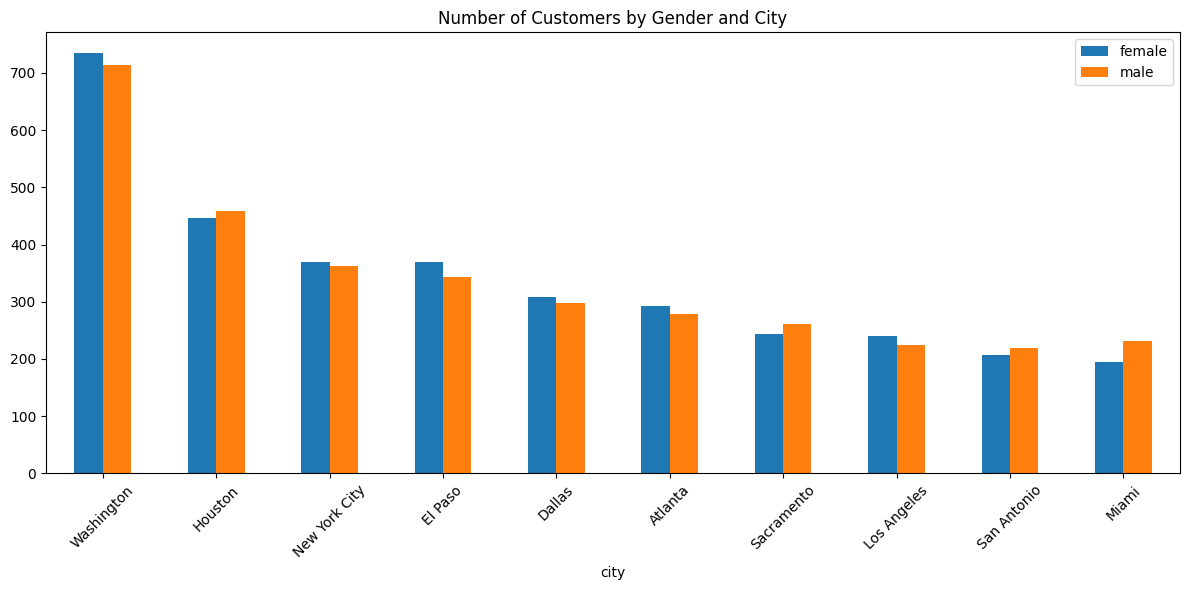

In [42]:
# Cell 6: Create visualization
ax = top_cities_data.plot.bar(
    'city',
    y=['female', 'male'],
    title='Number of Customers by Gender and City',
    figsize=(12, 6)
)
plt.xticks(rotation=45)
plt.tight_layout()